# Data Preprocessing of Titanic Dataset

- Problem Statement : Lets preprocess the data for a model to predict survived or killed person is a man,women or child in the tragic titanic incident.

# Importing Libraries

In [503]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [504]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Inspecting Data

In [505]:
df.shape

(891, 15)

In [506]:
df.size

13365

In [507]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [508]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [509]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Dropping Unecessary Columns

In [510]:
# Sex and who columns provide the same information
df[['sex','who','adult_male']].head(10)

# More or less information is same but extra information on child is available in the who column
# So decided to retain these columns
# But we can predict whether the person is adult male or not from sex andwho column
# So we can drop adult_male column

,sex,who,adult_male
0,male,man,True
1,female,woman,False
2,female,woman,False
3,female,woman,False
4,male,man,True
5,male,man,True
6,male,man,True
7,male,child,False
8,female,woman,False
9,female,child,False


In [511]:
df[['survived','alive']].head()
# Numerical column is easy to handle
# So we can drop alive column

,survived,alive
0,0,no
1,1,yes
2,1,yes
3,1,yes
4,0,no


In [512]:
df[['pclass','class']].head()
# Have same data so lets drop the categorical column 

,pclass,class
0,3,Third
1,1,First
2,3,Third
3,1,First
4,3,Third


In [513]:
df[['embarked','embark_town']].head()
# Have same data so lets drop the embark_town column 

,embarked,embark_town
0,S,Southampton
1,C,Cherbourg
2,S,Southampton
3,S,Southampton
4,S,Southampton


In [ ]:
# Dropping deck column because it has 288 missing values which is a huge amount and might skew the results if taken for training.

In [514]:
df = df.drop(columns=['alive','embark_town','class','adult_male','deck'], axis=1)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,alone
0,0,3,male,22.0,1,0,7.2500,S,man,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False
2,1,3,female,26.0,0,0,7.9250,S,woman,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False
4,0,3,male,35.0,0,0,8.0500,S,man,True


In [515]:
# converting the data type of alone column to int type

df['alone']= df['alone'].astype(int)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,alone
0,0,3,male,22.0,1,0,7.2500,S,man,0
1,1,1,female,38.0,1,0,71.2833,C,woman,0
2,1,3,female,26.0,0,0,7.9250,S,woman,1
3,1,1,female,35.0,1,0,53.1000,S,woman,0
4,0,3,male,35.0,0,0,8.0500,S,man,1


In [516]:
df.shape

(891, 10)

# Dropping Duplicates 

In [517]:
duplicated_rows = df.duplicated()

In [518]:
duplicated_rows.sum()

111

In [519]:
df.drop_duplicates(inplace = True) # Dropping duplicate data


In [520]:
df.shape # so from the result we can confirm that 107 rows are removed


(780, 10)

# Checking Missing Values

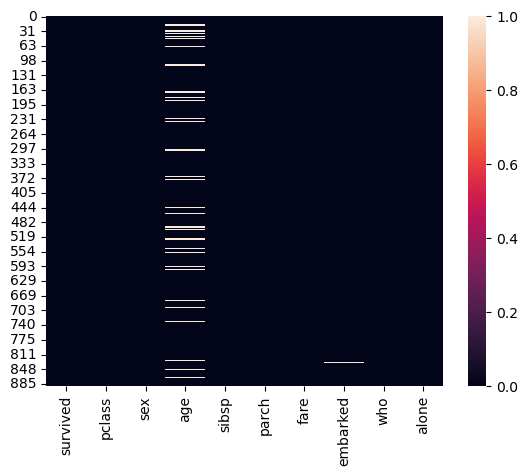

In [521]:
sns.heatmap(df.isna())
plt.show()

In [522]:
df.isna().sum()

survived      0
pclass        0
sex           0
age         104
sibsp         0
parch         0
fare          0
embarked      2
who           0
alone         0
dtype: int64

In [523]:
df.isna().sum()/df.shape[0]*100

survived     0.000000
pclass       0.000000
sex          0.000000
age         13.333333
sibsp        0.000000
parch        0.000000
fare         0.000000
embarked     0.256410
who          0.000000
alone        0.000000
dtype: float64

## Handling Missing Values

- Since there is lot of missing values in both deck and age column we cannot drop those rows

### Splitting Numerical and Categorical Columns

In [524]:
num_df = df.select_dtypes(include="number")
cat_df = df.select_dtypes(include=["object_","category"])

In [525]:
print("Numerical columns are")
num_cols = num_df.columns.tolist()
print(num_cols)

cat_cols = cat_df.columns.tolist()
print("Categorical columns are")
print(cat_cols)

Numerical columns are
['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'alone']
Categorical columns are
['sex', 'embarked', 'who']


### Check histograms of numerical columns for data imputation

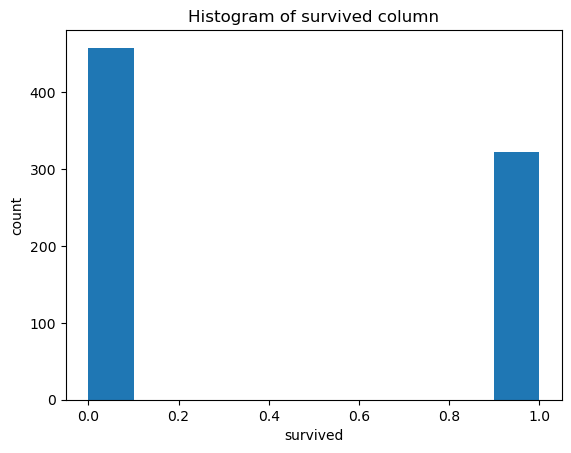

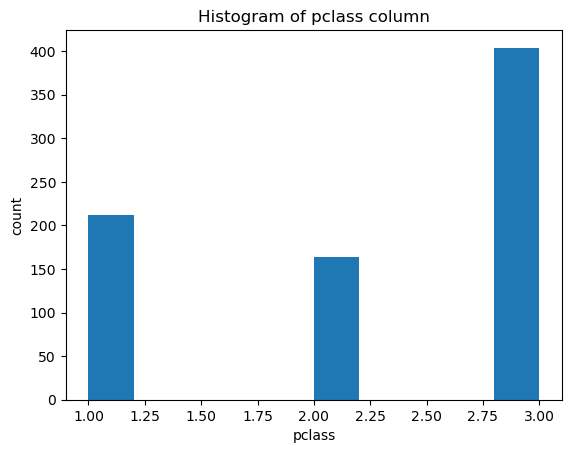

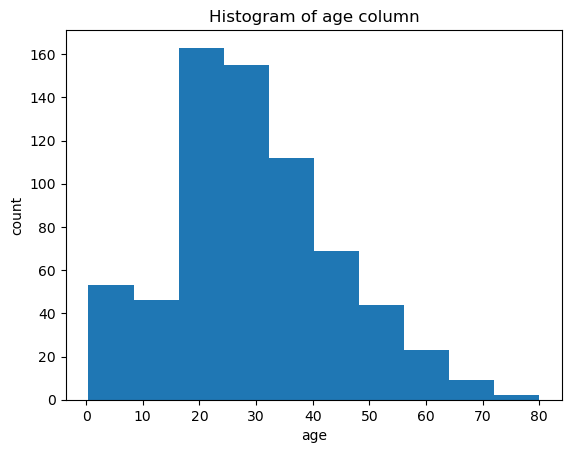

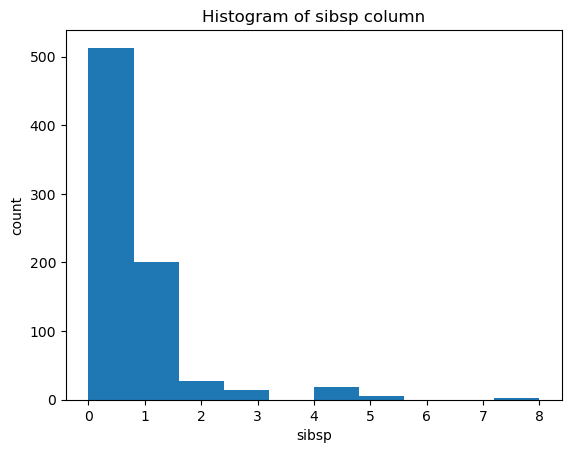

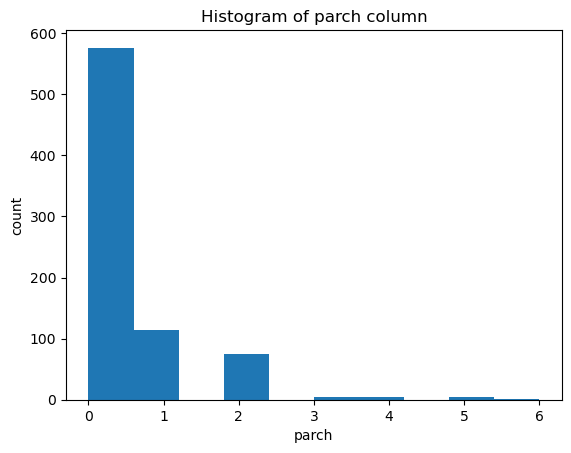

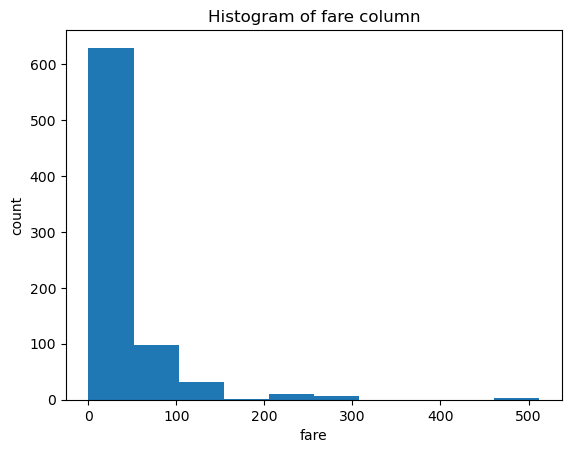

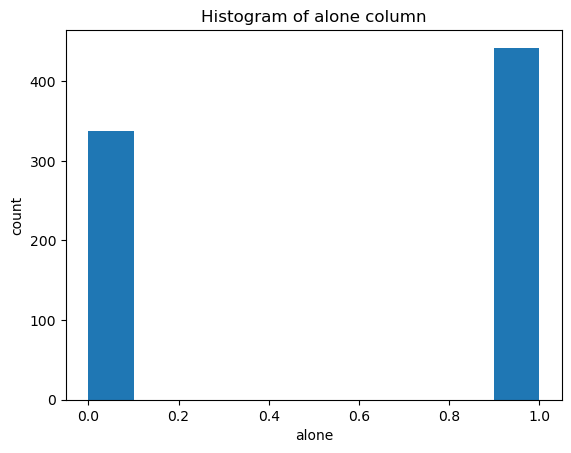

In [526]:
for col in num_cols:
  plt.hist(num_df[col])
  plt.title("Histogram of {} column".format(col))
  plt.xlabel(col)
  plt.ylabel("count")
  plt.show()

- Mostly the data is right skewed so we can handle the missing values with the median of the data

### Filling missing values for numerical columns

In [527]:
for col in num_cols:
  num_df[col] = num_df[col].fillna(num_df[col].median())

In [528]:
# Sanity check to see if missing values are filled
num_df.isna().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
alone       0
dtype: int64

### Filling missing values for categorical columns

In [529]:
for col in cat_cols:
    cat_df[col] = cat_df[col].fillna(cat_df[col].mode()[0])

In [530]:
cat_df[col].mode()

0    man
Name: who, dtype: object

In [531]:
# Sanity check to see if missing values are filled
cat_df.isna().sum()

sex         0
embarked    0
who         0
dtype: int64

### Recombine both Numerical and Categorical Columns

In [532]:
df = pd.concat([num_df, cat_df], axis=1)

In [533]:
df.isna().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
alone       0
sex         0
embarked    0
who         0
dtype: int64

# Outlier Handling

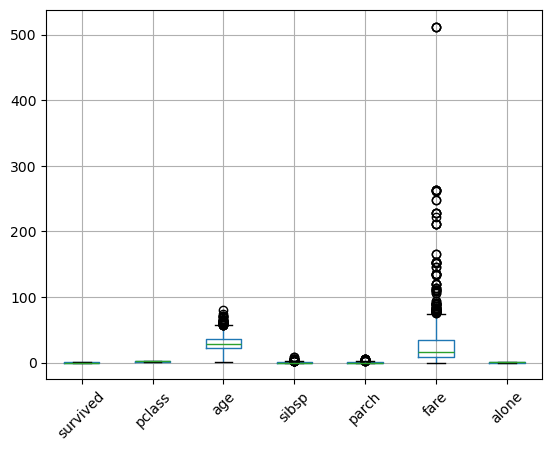

In [534]:
num_df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [535]:
def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df[column_name] = df[column_name].clip(upper=upper_bound)
    df[column_name] = df[column_name].clip(lower=lower_bound)
    return df[column_name]

In [536]:
for col in num_cols:
  num_df[col] = remove_outliers(num_df, col)

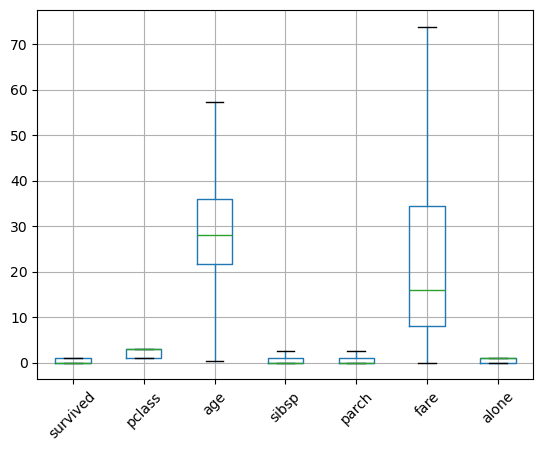

In [537]:
num_df.boxplot()
plt.xticks(rotation=45)
plt.show()

# Checking Data Imbalance

In [538]:
## Plot Class Imbalance

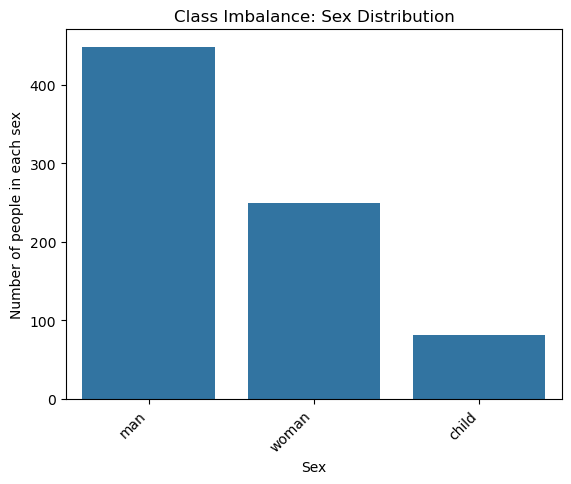

In [539]:
sns.countplot(x='who', data=df)
plt.title('Class Imbalance: Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Number of people in each sex')
plt.xticks(rotation=45, ha='right')
plt.show()

In [485]:
# Over Sampling  who columns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

X = df.drop('who', axis=1)
y = df['who']


oversampler = RandomOverSampler(random_state=1)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [486]:
# Create a new balanced DataFrame
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_df['who'] = y_resampled

# Check the class distribution after resampling
print(balanced_df['who'].value_counts())

who
man      451
woman    451
child    451
Name: count, dtype: int64


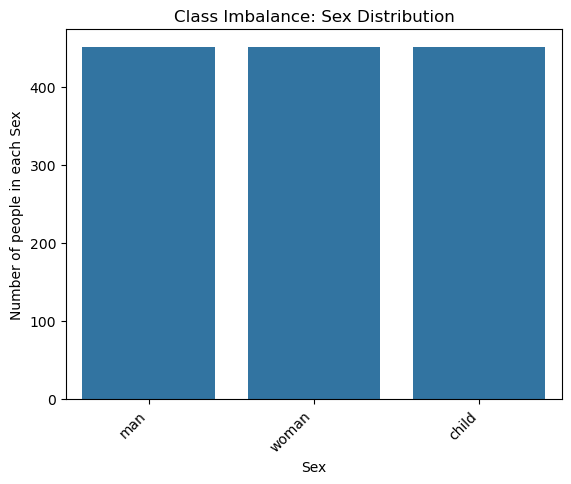

In [488]:
sns.countplot(x='who', data=balanced_df)
plt.title('Class Imbalance: Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Number of people in each Sex')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Combining who and sex columns

In [549]:
df['Sex']= df['sex']+ '_'+ df['who']
df = df.drop(['sex','who'],axis=1)
df

,survived,pclass,age,sibsp,parch,fare,alone,embarked,Sex
0,0,3,22.0,1,0,7.2500,0,S,male_man
1,1,1,38.0,1,0,71.2833,0,C,female_woman
2,1,3,26.0,0,0,7.9250,1,S,female_woman
3,1,1,35.0,1,0,53.1000,0,S,female_woman
4,0,3,35.0,0,0,8.0500,1,S,male_man
...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,0,Q,female_woman
887,1,1,19.0,0,0,30.0000,1,S,female_woman
888,0,3,28.0,1,2,23.4500,0,S,female_woman
889,1,1,26.0,0,0,30.0000,1,C,male_man


# Feature Encoding

In [551]:
# Encoding embarked column
df = pd.get_dummies(df,columns=['embarked'],dtype= int,drop_first=True)
df

,survived,pclass,age,sibsp,parch,fare,alone,Sex,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,0,male_man,0,1
1,1,1,38.0,1,0,71.2833,0,female_woman,0,0
2,1,3,26.0,0,0,7.9250,1,female_woman,0,1
3,1,1,35.0,1,0,53.1000,0,female_woman,0,1
4,0,3,35.0,0,0,8.0500,1,male_man,0,1
...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,0,female_woman,1,0
887,1,1,19.0,0,0,30.0000,1,female_woman,0,1
888,0,3,28.0,1,2,23.4500,0,female_woman,0,1
889,1,1,26.0,0,0,30.0000,1,male_man,0,0


# Feature Scaling

In [553]:
num_df = df.select_dtypes(include="number")
cat_df = df.select_dtypes(include=["object_","category"])

In [557]:
# min max scaling
from sklearn.preprocessing import MinMaxScaler
min_scaler = MinMaxScaler()
numerical_colms1 = ['survived','pclass','age', 'sibsp', 'parch','fare','alone','embarked_Q','embarked_S']
num_df[numerical_colms1] = min_scaler.fit_transform(num_df[numerical_colms1])
num_df[numerical_colms1]

,survived,pclass,age,sibsp,parch,fare,alone,embarked_Q,embarked_S
0,0.0,1.0,0.271174,0.125,0.000000,0.014151,0.0,0.0,1.0
1,1.0,0.0,0.472229,0.125,0.000000,0.139136,0.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.000000,0.015469,1.0,0.0,1.0
3,1.0,0.0,0.434531,0.125,0.000000,0.103644,0.0,0.0,1.0
4,0.0,1.0,0.434531,0.000,0.000000,0.015713,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
885,0.0,1.0,0.484795,0.000,0.833333,0.056848,0.0,1.0,0.0
887,1.0,0.0,0.233476,0.000,0.000000,0.058556,1.0,0.0,1.0
888,0.0,1.0,0.346569,0.125,0.333333,0.045771,0.0,0.0,1.0
889,1.0,0.0,0.321438,0.000,0.000000,0.058556,1.0,0.0,0.0


# Seperate Features and Labels

In [ ]:
y = cat_df
X = num_df

# Train test split

In [564]:
from sklearn.model_selection import train_test_split

In [565]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [566]:
X_train

,survived,pclass,age,sibsp,parch,fare,alone,sex,embarked,deck
371,0,3,18.0,1,0,6.4958,0,male,S,C
165,1,3,9.0,0,2,20.5250,0,male,S,C
779,1,1,43.0,0,1,211.3375,0,female,S,B
339,0,1,45.0,0,0,35.5000,1,male,S,C
607,1,1,27.0,0,0,30.5000,1,male,S,C
...,...,...,...,...,...,...,...,...,...,...
599,1,1,49.0,1,0,56.9292,0,male,C,A
661,0,3,40.0,0,0,7.2250,1,male,C,C
550,1,1,17.0,0,2,110.8833,0,male,C,C
591,1,1,52.0,1,0,78.2667,0,female,C,D
